In [1]:
# import useful libraries used for data loading and management
import pandas as pd 
import numpy as np

In [2]:
# load training and test datasets for titanic case

train = pd.read_csv('titanic_train.csv', index_col='PassengerId')
test = pd.read_csv('titanic_test.csv', index_col='PassengerId')

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
train.shape

(891, 11)

In [5]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [13]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Handling Missing Values

replace with mean

In [14]:
# Replace missing values in 'Age' with mean (numeric variables)

train['Age'].fillna(train['Age'].mean(),inplace=True)

In [15]:
# Replace missing values in 'Age' with mean (numeric variables)

train['Age'].fillna(train['Age'].mean(),inplace=True)

replace with mode

In [0]:
train['Embarked'].fillna(train['Embarked'].value_counts().index[0], inplace = True)

In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train['Embarked'].value_counts().index[0]

'S'

Remove the column

In [12]:
# Use .drop() to delete a column
train.drop(columns='Cabin',inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


Data Visualization

In [18]:
# Import useful libraries for data visualization

import pandas.util.testing as tm
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,6))

<ipython-input-18-a26dc66351c0>:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1296x432 with 0 Axes>

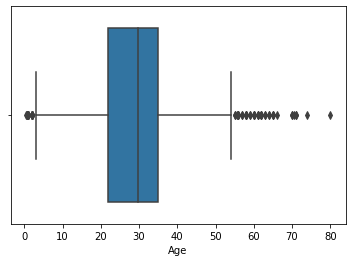

In [19]:
# Boxplot for one single numeric variable

ax=sns.boxplot(train['Age'])

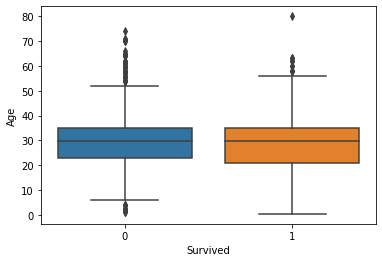

In [20]:
# Two dimensional boxplot, let’s see what is the distribution of 'Age' by 'Survived'

ax=sns.boxplot(x=train['Survived'], y=train['Age'])

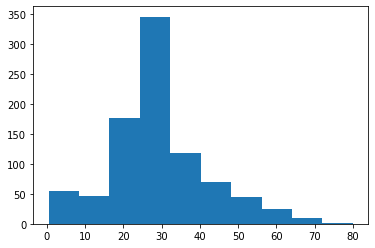

In [22]:
# Use .hist() to create histogram chart for a numeric variable

ax=train['Age'].hist(grid=False)

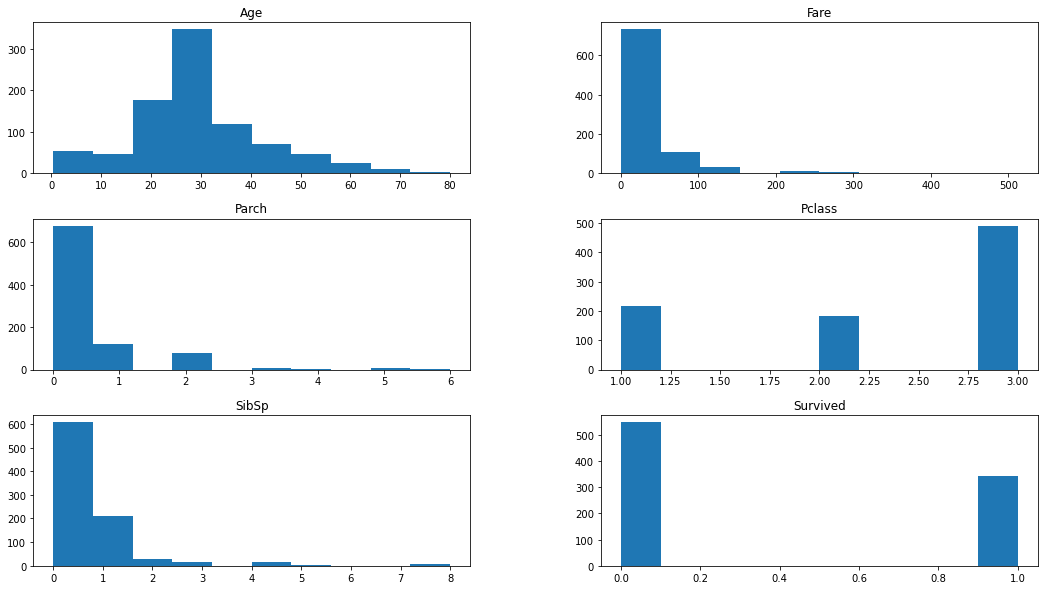

In [27]:
# Use .hist() to create histogram charts for all numeric variables

ax=train.hist(bins=10,figsize = (18,10), grid=False)

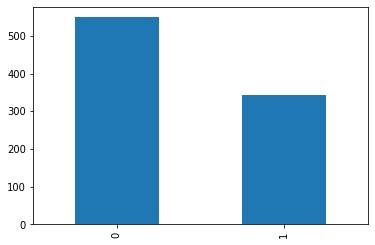

In [26]:
# Use .value_counts().plot to create bar chart for a categorical variable

ax=train['Survived'].value_counts().plot(kind='bar')

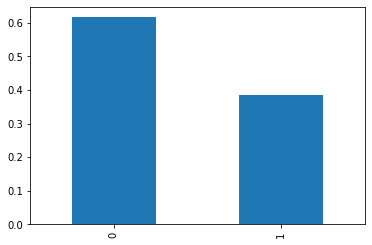

In [27]:
# If you apply normalization to 'Survived', you can get the distribution bounded between [0,1]

ax=train['Survived'].value_counts(normalize=True).plot(kind='bar')

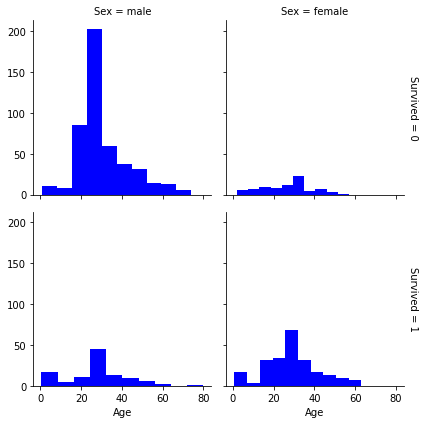

In [28]:
# You can create histogram with more dimensions by using matplotlib.pyplot Library

g = sns.FacetGrid(train, col='Sex', row='Survived', margin_titles=True)
g.map(plt.hist,'Age',color='blue')

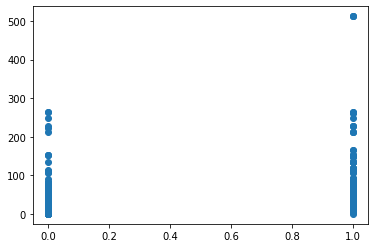

In [29]:
# Use plt.scatter() to create scatter plot

ax=plt.scatter(train['Survived'], train['Fare'])

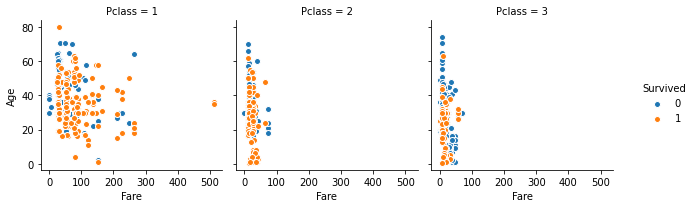

In [30]:
# Create scatter plot with more dimensions

g = sns.FacetGrid(train, hue='Survived', col='Pclass', margin_titles=True)
g=g.map(plt.scatter, 'Fare', 'Age',edgecolor='w').add_legend()